In [1]:
import numpy as np

In [2]:
a = np.arange(10)

In [3]:
a = a.reshape((2,-1))

In [4]:
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [5]:
b = np.stack([a,a])

In [6]:
b.shape

(2, 2, 5)

In [7]:
a = a.reshape(-1)

In [8]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
b = np.tile(a, 2).reshape(4,-1)

In [10]:
b

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [11]:
mask = b > 5
mask

array([[False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True]])

In [12]:
b[~mask] = -1

In [13]:
b

array([[-1, -1, -1, -1, -1],
       [-1,  6,  7,  8,  9],
       [-1, -1, -1, -1, -1],
       [-1,  6,  7,  8,  9]])

In [14]:
b = b.astype('float')

In [15]:
b[~mask] = np.NaN

In [16]:
b

array([[nan, nan, nan, nan, nan],
       [nan,  6.,  7.,  8.,  9.],
       [nan, nan, nan, nan, nan],
       [nan,  6.,  7.,  8.,  9.]])

In [17]:
slice_b = b[1:4, 1:4]

In [18]:
slice_b

array([[ 6.,  7.,  8.],
       [nan, nan, nan],
       [ 6.,  7.,  8.]])

In [19]:
np.nanmean(slice_b)

7.0

In [20]:
from skimage import img_as_ubyte
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import bayer

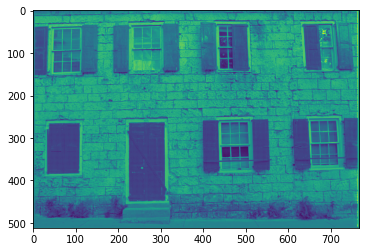

In [21]:
raw_img = img_as_ubyte(imread('tests/04_unittest_bilinear_img_input/01.png'))
plt.imshow(raw_img)

In [22]:
colored = bayer.get_colored_img(raw_img)

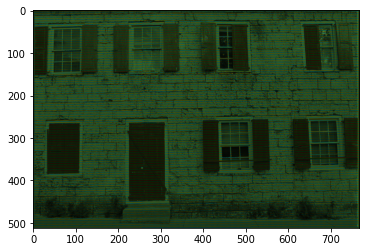

In [23]:
plt.imshow(colored)

In [24]:
img = img_as_ubyte(bayer.bilinear_interpolation(colored))

d:\SCIENCE, BITCH\IT\CV\Task1\bayer.py:112: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(img_slice)


In [25]:
gt_img = img_as_ubyte(imread('tests/04_unittest_bilinear_img_input/gt_01.png'))

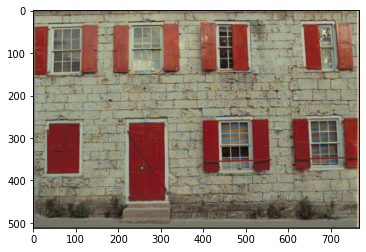

In [26]:
plt.imshow(gt_img)

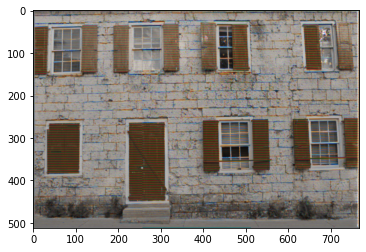

In [27]:
plt.imshow(img)

In [28]:
n_rows = raw_img.shape[0]
n_cols = raw_img.shape[1]
n_rows, n_cols

(512, 768)

In [29]:
masks = bayer.get_bayer_masks(n_rows, n_cols)

In [30]:
masks[:10, :5, 0]

array([[False,  True, False,  True, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True, False,  True, False],
       [False,  True, False,  True, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True, False,  True, False],
       [False,  True, False,  True, False],
       [False, False, False, False, False]])

In [46]:
aa = np.arange(24).reshape((2, 4, -1))
aa

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [47]:
np.nanmean(aa[..., 0])

10.5